In [1]:
import numpy;
import matplotlib.pyplot as plt;

from tensorflow.keras.initializers import TruncatedNormal;

from tqdm import tqdm;

In [2]:
# Training data
feature = numpy.array(
    [
        [0.08, 0.72], [0.26, 0.58], [0.45, 0.15], 
        [0.60, 0.30], [0.10, 1.0], [0.35, 0.95], 
        [0.70, 0.65], [0.92, 0.45]
    ]);

label = numpy.array([1, 1, 1, 1, -1, -1, -1, -1]);

In [3]:
class AdalineLMS:

    # Hyperparameters
    def __init__(self, feature, label):
        
        self.learning_rate = 1e-1;
        self.epoch = 200;

        initializer = TruncatedNormal(mean = 0.5, stddev = 0.02)(shape = (1, 3)).numpy();

        # Weight initial
        self.weight_x1 = initializer[0][0];
        self.weight_x2 = initializer[0][1];

        # Bias just in case
        self.bias = initializer[0][2];

        # Load dataset
        self.feature = feature;
        self.label = label;
    
        print("AdalineLMS initial configuration:");
        print(f"weight x1 {self.weight_x1} - weight x2: {self.weight_x2} - bias: {self.bias}");
        print("\n\n\n");

    # Mean Squared Error
    def _mse(self, prediction):
        return numpy.mean((self.label - prediction) ** 2);

    # Feed Forward process
    def forward(self):
        predictions = [];

        for i in self.feature:
            prediction = (self.weight_x1 * i[0]) + (self.weight_x2 * i[1]) + self.bias;

            predictions.append(prediction);

        return predictions;

    # Learning Rule: LMS Implementation
    def learning_rule(self, predictions):

        # new weight x1 = current weight + (learning rate x (ground truth - prediction) x x1
        for i in tqdm(range(len(self.feature))):
            truth_difference = (self.label[i] - predictions[i]);

            new_weight_x1 = (self.weight_x1 + (self.learning_rate * truth_difference * self.feature[i][0]));
            new_weight_x2 = (self.weight_x2 + (self.learning_rate * truth_difference * self.feature[i][1]));
            new_bias = self.bias + self.learning_rate * truth_difference;

            # print(f"new_weight_x1: {new_weight[0]} - new_weight_x2: {new_weight[1]}")
    
            self.weight_x1 = new_weight_x1;
            self.weight_x2 = new_weight_x2;
            self.bias = new_bias;
    
    def train(self):

        loss_history = [];
        
        # Loop 200 epochs
        for i in range(self.epoch):
            
            print(f"Epoch [{i + 1} / {self.epoch}] -", end = " ");

            loss = 0.0;

            # Forward pass 
            predictions = self.forward();

            # Count current epoch's loss
            loss = self._mse(predictions);

            # Apply LMS to update weight
            self.learning_rule(predictions);
                

            loss_history.append(loss);
            print(f"Epoch {i + 1} - loss: {round(loss, 4)} - weight x1: {self.weight_x1} - weight x2: {self.weight_x2}\n");

         # Plotting MSE curve
        plt.figure(figsize=(10, 6));
        plt.plot(range(self.epoch), loss_history, label='MSE');
        plt.xlabel('Epoch');
        plt.ylabel('Mean Squared Error');
        plt.title('MSE over Epochs');
        plt.legend();
        plt.show()           


AdalineLMS initial configuration:
weight x1 0.4853249192237854 - weight x2: 0.4947303831577301 - bias: 0.5065215229988098




Epoch [1 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 1 - loss: 2.2876 - weight x1: 0.0529442462366819 - weight x2: -0.13658932349205033

Epoch [2 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 2 - loss: 1.0987 - weight x1: 0.10301626301761672 - weight x2: -0.08219593189534144

Epoch [3 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8025.46it/s]


Epoch 3 - loss: 0.9931 - weight x1: 0.03246878874470846 - weight x2: -0.19505886006558543

Epoch [4 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 4 - loss: 0.956 - weight x1: -0.008466660061131087 - weight x2: -0.263121693207843

Epoch [5 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 5 - loss: 0.9244 - weight x1: -0.05702724787213602 - weight x2: -0.3393323256756092

Epoch [6 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 6 - loss: 0.8944 - weight x1: -0.10381614663166622 - weight x2: -0.4106807435053251

Epoch [7 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 7 - loss: 0.8656 - weight x1: -0.15105498359882744 - weight x2: -0.4805566903278751

Epoch [8 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 8 - loss: 0.838 - weight x1: -0.1980870107537541 - weight x2: -0.5482570248450135

Epoch [9 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 9 - loss: 0.8114 - weight x1: -0.2449832707415756 - weight x2: -0.6140861595540655

Epoch [10 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 10 - loss: 0.786 - weight x1: -0.29164414026090496 - weight x2: -0.6780878399876111

Epoch [11 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 11 - loss: 0.7615 - weight x1: -0.3380219023940474 - weight x2: -0.740361607520232

Epoch [12 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 12 - loss: 0.738 - weight x1: -0.3840644558036353 - weight x2: -0.8009848503571965

Epoch [13 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 13 - loss: 0.7154 - weight x1: -0.4297285002499774 - weight x2: -0.8600329266256705

Epoch [14 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8027.38it/s]


Epoch 14 - loss: 0.6937 - weight x1: -0.47497551013506556 - weight x2: -0.9175748169836138

Epoch [15 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 15 - loss: 0.6728 - weight x1: -0.519772060455029 - weight x2: -0.9736748062469176

Epoch [16 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 16 - loss: 0.6527 - weight x1: -0.5640891326850621 - weight x2: -1.028392610102409

Epoch [17 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 17 - loss: 0.6334 - weight x1: -0.6079017316586877 - weight x2: -1.0817838391148136

Epoch [18 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 18 - loss: 0.6149 - weight x1: -0.6511884769372707 - weight x2: -1.1339003337370144

Epoch [19 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 19 - loss: 0.597 - weight x1: -0.6939312476090023 - weight x2: -1.184790490499123

Epoch [20 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8013.96it/s]


Epoch 20 - loss: 0.5798 - weight x1: -0.7361148565205622 - weight x2: -1.2344995532341292

Epoch [21 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8008.22it/s]


Epoch 21 - loss: 0.5633 - weight x1: -0.7777267559609058 - weight x2: -1.2830698792607322

Epoch [22 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 22 - loss: 0.5474 - weight x1: -0.8187567707074653 - weight x2: -1.3305411811553582

Epoch [23 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8035.07it/s]


Epoch 23 - loss: 0.5321 - weight x1: -0.8591968561962811 - weight x2: -1.376950746770961

Epoch [24 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 24 - loss: 0.5173 - weight x1: -0.8990408794174457 - weight x2: -1.422333639396783

Epoch [25 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 25 - loss: 0.5032 - weight x1: -0.9382844204498729 - weight x2: -1.4667228799077356

Epoch [26 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 26 - loss: 0.4895 - weight x1: -0.9769245927192411 - weight x2: -1.51014961254962

Epoch [27 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 27 - loss: 0.4764 - weight x1: -1.0149598802454896 - weight x2: -1.5526432558627368

Epoch [28 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 15701.65it/s]


Epoch 28 - loss: 0.4638 - weight x1: -1.0523899903048701 - weight x2: -1.5942316401060173

Epoch [29 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 29 - loss: 0.4516 - weight x1: -1.0892157200773205 - weight x2: -1.6349411324188403

Epoch [30 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 30 - loss: 0.4399 - weight x1: -1.1254388359817935 - weight x2: -1.6747967508436252

Epoch [31 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 31 - loss: 0.4287 - weight x1: -1.1610619645219935 - weight x2: -1.713822268228879

Epoch [32 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 32 - loss: 0.4178 - weight x1: -1.1960884935737088 - weight x2: -1.7520403069384876

Epoch [33 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8017.79it/s]


Epoch 33 - loss: 0.4074 - weight x1: -1.230522483143641 - weight x2: -1.7894724252077943

Epoch [34 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 34 - loss: 0.3974 - weight x1: -1.2643685847192374 - weight x2: -1.8261391959096223

Epoch [35 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8008.22it/s]


Epoch 35 - loss: 0.3877 - weight x1: -1.297631968410362 - weight x2: -1.8620602784231626

Epoch [36 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 36 - loss: 0.3784 - weight x1: -1.33031825715749 - weight x2: -1.8972544842348653

Epoch [37 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 37 - loss: 0.3695 - weight x1: -1.3624334673481173 - weight x2: -1.9317398368425904

Epoch [38 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 38 - loss: 0.3609 - weight x1: -1.3939839552439204 - weight x2: -1.9655336264817092

Epoch [39 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 39 - loss: 0.3526 - weight x1: -1.4249763686764332 - weight x2: -1.998652460144148

Epoch [40 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 40 - loss: 0.3446 - weight x1: -1.4554176035191204 - weight x2: -2.031112307318038

Epoch [41 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 41 - loss: 0.337 - weight x1: -1.4853147644892521 - weight x2: -2.062928541836326

Epoch [42 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 42 - loss: 0.3296 - weight x1: -1.5146751298742676 - weight x2: -2.094115980187006

Epoch [43 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 43 - loss: 0.3225 - weight x1: -1.5435061198148268 - weight x2: -2.1246889166052076

Epoch [44 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 44 - loss: 0.3156 - weight x1: -1.5718152678107704 - weight x2: -2.154661155237979

Epoch [45 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 45 - loss: 0.3091 - weight x1: -1.5996101951471042 - weight x2: -2.1840460396458745

Epoch [46 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 46 - loss: 0.3027 - weight x1: -1.6268985879651716 - weight x2: -2.212856479881231

Epoch [47 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 47 - loss: 0.2966 - weight x1: -1.6536881767296154 - weight x2: -2.2411049773609695

Epoch [48 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 48 - loss: 0.2908 - weight x1: -1.679986717864851 - weight x2: -2.2688036477318128

Epoch [49 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 49 - loss: 0.2851 - weight x1: -1.70580197735573 - weight x2: -2.295964241907635

Epoch [50 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7913.78it/s]


Epoch 50 - loss: 0.2797 - weight x1: -1.7311417161261213 - weight x2: -2.322598165442204

Epoch [51 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 51 - loss: 0.2744 - weight x1: -1.756013677026396 - weight x2: -2.348716496385606

Epoch [52 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 52 - loss: 0.2694 - weight x1: -1.7804255732765049 - weight x2: -2.3743300017590854

Epoch [53 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 53 - loss: 0.2646 - weight x1: -1.8043850782255522 - weight x2: -2.3994491527706834

Epoch [54 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 54 - loss: 0.2599 - weight x1: -1.8278998163017086 - weight x2: -2.424084138882877

Epoch [55 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 55 - loss: 0.2554 - weight x1: -1.8509773550380126 - weight x2: -2.4482448808332617

Epoch [56 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 56 - loss: 0.2511 - weight x1: -1.8736251980702638 - weight x2: -2.4719410427000823

Epoch [57 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 57 - loss: 0.2469 - weight x1: -1.8958507790128751 - weight x2: -2.495182043096048

Epoch [58 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 58 - loss: 0.2429 - weight x1: -1.9176614561273015 - weight x2: -2.5179770655662588

Epoch [59 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 59 - loss: 0.2391 - weight x1: -1.9390645077056416 - weight x2: -2.540335068259167

Epoch [60 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7991.05it/s]


Epoch 60 - loss: 0.2354 - weight x1: -1.9600671280992097 - weight x2: -2.5622647929332154

Epoch [61 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 61 - loss: 0.2318 - weight x1: -1.9806764243284458 - weight x2: -2.5837747733561165

Epoch [62 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 62 - loss: 0.2284 - weight x1: -2.00089941321647 - weight x2: -2.60487334314854

Epoch [63 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 63 - loss: 0.225 - weight x1: -2.020743018993986 - weight x2: -2.6255686431193235

Epoch [64 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 64 - loss: 0.2219 - weight x1: -2.0402140713281423 - weight x2: -2.645868628134994

Epoch [65 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 65 - loss: 0.2188 - weight x1: -2.0593193037324005 - weight x2: -2.6657810735625844

Epoch [66 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7989.15it/s]


Epoch 66 - loss: 0.2159 - weight x1: -2.078065352318498 - weight x2: -2.685313581321164

Epoch [67 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 67 - loss: 0.213 - weight x1: -2.096458754855243 - weight x2: -2.70447358557432

Epoch [68 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 68 - loss: 0.2103 - weight x1: -2.1145059501022216 - weight x2: -2.723268358092944

Epoch [69 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 69 - loss: 0.2077 - weight x1: -2.1322132773894853 - weight x2: -2.741705013315019

Epoch [70 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 70 - loss: 0.2051 - weight x1: -2.149586976417044 - weight x2: -2.759790513126722

Epoch [71 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7998.67it/s]


Epoch 71 - loss: 0.2027 - weight x1: -2.1666331872504525 - weight x2: -2.777531671386983

Epoch [72 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 72 - loss: 0.2004 - weight x1: -2.183357950491051 - weight x2: -2.794935158215668

Epoch [73 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 73 - loss: 0.1981 - weight x1: -2.199767207601441 - weight x2: -2.812007504063755

Epoch [74 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 74 - loss: 0.1959 - weight x1: -2.2158668013686333 - weight x2: -2.8287551035822402

Epoch [75 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 75 - loss: 0.1938 - weight x1: -2.2316624764890145 - weight x2: -2.8451842193050445

Epoch [76 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 76 - loss: 0.1918 - weight x1: -2.24715988026075 - weight x2: -2.861300985159839

Epoch [77 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 77 - loss: 0.1899 - weight x1: -2.262364563370682 - weight x2: -2.8771114098194714

Epoch [78 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 78 - loss: 0.188 - weight x1: -2.277281980763991 - weight x2: -2.892621379905595

Epoch [79 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 79 - loss: 0.1862 - weight x1: -2.2919174925860424 - weight x2: -2.9078366630550514

Epoch [80 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 80 - loss: 0.1845 - weight x1: -2.3062763651868887 - weight x2: -2.922762910858699

Epoch [81 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 81 - loss: 0.1829 - weight x1: -2.320363772179787 - weight x2: -2.9374056616814705

Epoch [82 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 82 - loss: 0.1813 - weight x1: -2.33418479554601 - weight x2: -2.9517703433717593

Epoch [83 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 83 - loss: 0.1797 - weight x1: -2.3477444267789056 - weight x2: -2.9658622758674924

Epoch [84 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7998.67it/s]


Epoch 84 - loss: 0.1782 - weight x1: -2.3610475680609504 - weight x2: -2.9796866737056416

Epoch [85 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 85 - loss: 0.1768 - weight x1: -2.3740990334681102 - weight x2: -2.9932486484413623

Epoch [86 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 86 - loss: 0.1755 - weight x1: -2.386903550196415 - weight x2: -3.0065532109824122

Epoch [87 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 87 - loss: 0.1741 - weight x1: -2.3994657598061755 - weight x2: -3.0196052738440393

Epoch [88 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 15738.48it/s]


Epoch 88 - loss: 0.1729 - weight x1: -2.411790219479737 - weight x2: -3.032409653329111

Epoch [89 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 89 - loss: 0.1716 - weight x1: -2.4238814032890903 - weight x2: -3.0449710716378457

Epoch [90 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 90 - loss: 0.1705 - weight x1: -2.435743703470041 - weight x2: -3.057294158911161

Epoch [91 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 91 - loss: 0.1693 - weight x1: -2.447381431699995 - weight x2: -3.069383455211342

Epoch [92 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8000.58it/s]


Epoch 92 - loss: 0.1682 - weight x1: -2.4587988203767384 - weight x2: -3.0812434124434174

Epoch [93 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 93 - loss: 0.1672 - weight x1: -2.4700000238958504 - weight x2: -3.0928783962203705

Epoch [94 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 5290.83it/s]


Epoch 94 - loss: 0.1662 - weight x1: -2.480989119924682 - weight x2: -3.104292687675088

Epoch [95 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 95 - loss: 0.1652 - weight x1: -2.491770110671041 - weight x2: -3.1154904852216854

Epoch [96 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 96 - loss: 0.1643 - weight x1: -2.502346924144947 - weight x2: -3.1264759062686833

Epoch [97 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7084.97it/s]


Epoch 97 - loss: 0.1634 - weight x1: -2.512723415412013 - weight x2: -3.1372529888863143

Epoch [98 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 98 - loss: 0.1625 - weight x1: -2.5229033678371664 - weight x2: -3.1478256934300446

Epoch [99 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7985.35it/s]


Epoch 99 - loss: 0.1617 - weight x1: -2.5328904943176123 - weight x2: -3.158197904122287

Epoch [100 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 100 - loss: 0.1609 - weight x1: -2.542688438504043 - weight x2: -3.168373430594108

Epoch [101 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8029.30it/s]


Epoch 101 - loss: 0.1601 - weight x1: -2.5523007760092526 - weight x2: -3.1783560093885934

Epoch [102 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 102 - loss: 0.1594 - weight x1: -2.5617310156034243 - weight x2: -3.1881493054274794

Epoch [103 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 103 - loss: 0.1587 - weight x1: -2.5709826003954572 - weight x2: -3.1977569134424626

Epoch [104 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8021.62it/s]


Epoch 104 - loss: 0.158 - weight x1: -2.580058908999795 - weight x2: -3.2071823593725854

Epoch [105 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 105 - loss: 0.1573 - weight x1: -2.588963256688302 - weight x2: -3.21642910172895

Epoch [106 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 106 - loss: 0.1567 - weight x1: -2.597698896526812 - weight x2: -3.2255005329279487

Epoch [107 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 107 - loss: 0.156 - weight x1: -2.606269020496043 - weight x2: -3.2343999805941377

Epoch [108 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 108 - loss: 0.1555 - weight x1: -2.6146767605966184 - weight x2: -3.2431307088337906

Epoch [109 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 109 - loss: 0.1549 - weight x1: -2.6229251899380204 - weight x2: -3.251695919480113

Epoch [110 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 110 - loss: 0.1543 - weight x1: -2.631017323811308 - weight x2: -3.2600987533110484

Epoch [111 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 111 - loss: 0.1538 - weight x1: -2.6389561207455237 - weight x2: -3.2683422912405393

Epoch [112 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 112 - loss: 0.1533 - weight x1: -2.646744483547708 - weight x2: -3.2764295554840714

Epoch [113 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 113 - loss: 0.1528 - weight x1: -2.654385260326514 - weight x2: -3.2843635106992792

Epoch [114 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 114 - loss: 0.1524 - weight x1: -2.6618812454994125 - weight x2: -3.2921470651023377

Epoch [115 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 115 - loss: 0.1519 - weight x1: -2.669235180783534 - weight x2: -3.2997830715608525

Epoch [116 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 116 - loss: 0.1515 - weight x1: -2.6764497561701988 - weight x2: -3.307274328663898

Epoch [117 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 117 - loss: 0.151 - weight x1: -2.683527610883227 - weight x2: -3.3146235817698435

Epoch [118 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 118 - loss: 0.1506 - weight x1: -2.6904713343211104 - weight x2: -3.3218335240325603

Epoch [119 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 119 - loss: 0.1503 - weight x1: -2.6972834669831878 - weight x2: -3.32890679740658

Epoch [120 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 120 - loss: 0.1499 - weight x1: -2.7039665013799334 - weight x2: -3.335845993631756

Epoch [121 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8012.04it/s]


Epoch 121 - loss: 0.1495 - weight x1: -2.7105228829275254 - weight x2: -3.342653655197954

Epoch [122 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 122 - loss: 0.1492 - weight x1: -2.716955010826831 - weight x2: -3.349332276290251

Epoch [123 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 123 - loss: 0.1488 - weight x1: -2.7232652389270005 - weight x2: -3.355884303715152

Epoch [124 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 124 - loss: 0.1485 - weight x1: -2.729455876573818 - weight x2: -3.3623121378082486

Epoch [125 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 125 - loss: 0.1482 - weight x1: -2.735529189443024 - weight x2: -3.3686181333238068

Epoch [126 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 126 - loss: 0.1479 - weight x1: -2.7414874003587655 - weight x2: -3.37480460030666

Epoch [127 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 127 - loss: 0.1476 - weight x1: -2.7473326900973976 - weight x2: -3.380873804946856

Epoch [128 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 128 - loss: 0.1474 - weight x1: -2.7530671981768235 - weight x2: -3.386827970417433

Epoch [129 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 129 - loss: 0.1471 - weight x1: -2.7586930236315683 - weight x2: -3.3926692776957093

Epoch [130 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 130 - loss: 0.1468 - weight x1: -2.764212225773808 - weight x2: -3.398399866368456

Epoch [131 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 131 - loss: 0.1466 - weight x1: -2.7696268249405533 - weight x2: -3.404021835421312

Epoch [132 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 132 - loss: 0.1464 - weight x1: -2.7749388032271893 - weight x2: -3.409537244012784

Epoch [133 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 133 - loss: 0.1461 - weight x1: -2.780150105207597 - weight x2: -3.4149481122331604

Epoch [134 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 134 - loss: 0.1459 - weight x1: -2.785262638641057 - weight x2: -3.4202564218486713

Epoch [135 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 135 - loss: 0.1457 - weight x1: -2.7902782751661435 - weight x2: -3.4254641170312046

Epoch [136 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8000.58it/s]


Epoch 136 - loss: 0.1455 - weight x1: -2.7951988509818317 - weight x2: -3.4305731050738792

Epoch [137 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7992.96it/s]


Epoch 137 - loss: 0.1453 - weight x1: -2.8000261675160125 - weight x2: -3.4355852570927827

Epoch [138 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 138 - loss: 0.1451 - weight x1: -2.804761992081632 - weight x2: -3.440502408715151

Epoch [139 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 4000.29it/s]


Epoch 139 - loss: 0.1449 - weight x1: -2.809408058520666 - weight x2: -3.4453263607542737

Epoch [140 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 140 - loss: 0.1448 - weight x1: -2.8139660678361254 - weight x2: -3.4500588798714

Epoch [141 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 141 - loss: 0.1446 - weight x1: -2.818437688812309 - weight x2: -3.45470169922491

Epoch [142 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 142 - loss: 0.1444 - weight x1: -2.8228245586234926 - weight x2: -3.459256519107005

Epoch [143 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 143 - loss: 0.1443 - weight x1: -2.827128283431267 - weight x2: -3.463725007568182

Epoch [144 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 144 - loss: 0.1441 - weight x1: -2.831350438970723 - weight x2: -3.468108801029724

Epoch [145 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 145 - loss: 0.144 - weight x1: -2.8354925711256658 - weight x2: -3.472409504884451

Epoch [146 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 146 - loss: 0.1439 - weight x1: -2.839556196493071 - weight x2: -3.4766286940859765

Epoch [147 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 5303.37it/s]


Epoch 147 - loss: 0.1437 - weight x1: -2.8435428029369594 - weight x2: -3.4807679137266794

Epoch [148 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 148 - loss: 0.1436 - weight x1: -2.847453850131891 - weight x2: -3.4848286796046284

Epoch [149 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7996.77it/s]


Epoch 149 - loss: 0.1435 - weight x1: -2.851290770096254 - weight x2: -3.488812478779679

Epoch [150 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 150 - loss: 0.1434 - weight x1: -2.855054967715544 - weight x2: -3.492720770118943

Epoch [151 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 5298.35it/s]


Epoch 151 - loss: 0.1432 - weight x1: -2.858747821255802 - weight x2: -3.4965549848318496

Epoch [152 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 152 - loss: 0.1431 - weight x1: -2.862370682867403 - weight x2: -3.5003165269950025

Epoch [153 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8004.40it/s]


Epoch 153 - loss: 0.143 - weight x1: -2.865924879079361 - weight x2: -3.5040067740670295

Epoch [154 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 154 - loss: 0.1429 - weight x1: -2.8694117112843287 - weight x2: -3.5076270773936153

Epoch [155 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 155 - loss: 0.1428 - weight x1: -2.872832456214464 - weight x2: -3.5111787627029183

Epoch [156 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 156 - loss: 0.1427 - weight x1: -2.8761883664083245 - weight x2: -3.5146631305915497

Epoch [157 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7981.55it/s]


Epoch 157 - loss: 0.1426 - weight x1: -2.8794806706689617 - weight x2: -3.5180814570013017

Epoch [158 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 158 - loss: 0.1426 - weight x1: -2.8827105745133745 - weight x2: -3.5214349936868086

Epoch [159 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7991.05it/s]


Epoch 159 - loss: 0.1425 - weight x1: -2.8858792606134838 - weight x2: -3.5247249686743

Epoch [160 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 160 - loss: 0.1424 - weight x1: -2.888987889228783 - weight x2: -3.5279525867116415

Epoch [161 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 161 - loss: 0.1423 - weight x1: -2.892037598630819 - weight x2: -3.531119029709806

Epoch [162 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7992.96it/s]


Epoch 162 - loss: 0.1422 - weight x1: -2.895029505519661 - weight x2: -3.5342254571759653

Epoch [163 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 163 - loss: 0.1422 - weight x1: -2.897964705432494 - weight x2: -3.5372730066383333

Epoch [164 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 164 - loss: 0.1421 - weight x1: -2.900844273144501 - weight x2: -3.5402627940629596

Epoch [165 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 165 - loss: 0.142 - weight x1: -2.903669263062161 - weight x2: -3.543195914262582

Epoch [166 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 166 - loss: 0.142 - weight x1: -2.906440709609117 - weight x2: -3.546073441297727

Epoch [167 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]

Epoch 167 - loss: 0.1419 - weight x1: -2.9091596276047444 - weight x2: -3.5488964288701883

Epoch [168 / 200] - 


100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 168 - loss: 0.1418 - weight x1: -2.9118270126355656 - weight x2: -3.5516659107090347

Epoch [169 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 169 - loss: 0.1418 - weight x1: -2.9144438414196325 - weight x2: -3.554382900949285

Epoch [170 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 170 - loss: 0.1417 - weight x1: -2.917011072164024 - weight x2: -3.557048394503403

Epoch [171 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 171 - loss: 0.1417 - weight x1: -2.919529644915574 - weight x2: -3.559663367425728

Epoch [172 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8006.31it/s]


Epoch 172 - loss: 0.1416 - weight x1: -2.9220004819049636 - weight x2: -3.562228777270003

Epoch [173 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8006.31it/s]


Epoch 173 - loss: 0.1416 - weight x1: -2.924424487884303 - weight x2: -3.564745563440107

Epoch [174 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 174 - loss: 0.1415 - weight x1: -2.926802550458322 - weight x2: -3.567214647534137

Epoch [175 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 175 - loss: 0.1415 - weight x1: -2.929135540409297 - weight x2: -3.5696369336819593

Epoch [176 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 176 - loss: 0.1414 - weight x1: -2.931424312015818 - weight x2: -3.5720133088763615

Epoch [177 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 177 - loss: 0.1414 - weight x1: -2.9336697033655277 - weight x2: -3.574344643297911

Epoch [178 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 178 - loss: 0.1414 - weight x1: -2.935872536661937 - weight x2: -3.5766317906336638

Epoch [179 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7992.96it/s]


Epoch 179 - loss: 0.1413 - weight x1: -2.93803361852543 - weight x2: -3.578875588389821

Epoch [180 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 180 - loss: 0.1413 - weight x1: -2.940153740288569 - weight x2: -3.5810768581984536

Epoch [181 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 181 - loss: 0.1412 - weight x1: -2.942233678285812 - weight x2: -3.583236406118417

Epoch [182 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7910.05it/s]


Epoch 182 - loss: 0.1412 - weight x1: -2.9442741941377304 - weight x2: -3.585355022930548

Epoch [183 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 183 - loss: 0.1412 - weight x1: -2.9462760350298622 - weight x2: -3.5874334844272755

Epoch [184 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7989.15it/s]


Epoch 184 - loss: 0.1411 - weight x1: -2.9482399339862644 - weight x2: -3.5894725516967276

Epoch [185 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 185 - loss: 0.1411 - weight x1: -2.9501666101378983 - weight x2: -3.591472971401462

Epoch [186 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 186 - loss: 0.1411 - weight x1: -2.952056768985921 - weight x2: -3.5934354760518996

Epoch [187 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 187 - loss: 0.1411 - weight x1: -2.9539111026599976 - weight x2: -3.5953607842745865

Epoch [188 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 188 - loss: 0.141 - weight x1: -2.9557302901717106 - weight x2: -3.5972496010753536

Epoch [189 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 189 - loss: 0.141 - weight x1: -2.9575149976631763 - weight x2: -3.5991026180975036

Epoch [190 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 190 - loss: 0.141 - weight x1: -2.959265878650948 - weight x2: -3.600920513875089

Epoch [191 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 191 - loss: 0.141 - weight x1: -2.9609835742652937 - weight x2: -3.602703954081396

Epoch [192 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 192 - loss: 0.1409 - weight x1: -2.962668713484951 - weight x2: -3.604453591772715

Epoch [193 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 193 - loss: 0.1409 - weight x1: -2.964321913367422 - weight x2: -3.6061700676274886

Epoch [194 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 194 - loss: 0.1409 - weight x1: -2.9659437792749133 - weight x2: -3.6078540101809264

Epoch [195 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 195 - loss: 0.1409 - weight x1: -2.9675349050959894 - weight x2: -3.609506036055175

Epoch [196 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 196 - loss: 0.1408 - weight x1: -2.9690958734630293 - weight x2: -3.6111267501851163

Epoch [197 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 197 - loss: 0.1408 - weight x1: -2.970627255965563 - weight x2: -3.6127167460398977

Epoch [198 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 198 - loss: 0.1408 - weight x1: -2.97212961335956 - weight x2: -3.6142766058402507

Epoch [199 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 199 - loss: 0.1408 - weight x1: -2.9736034957727595 - weight x2: -3.6158069007716973

Epoch [200 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 200 - loss: 0.1408 - weight x1: -2.975049442906103 - weight x2: -3.6173081911937097



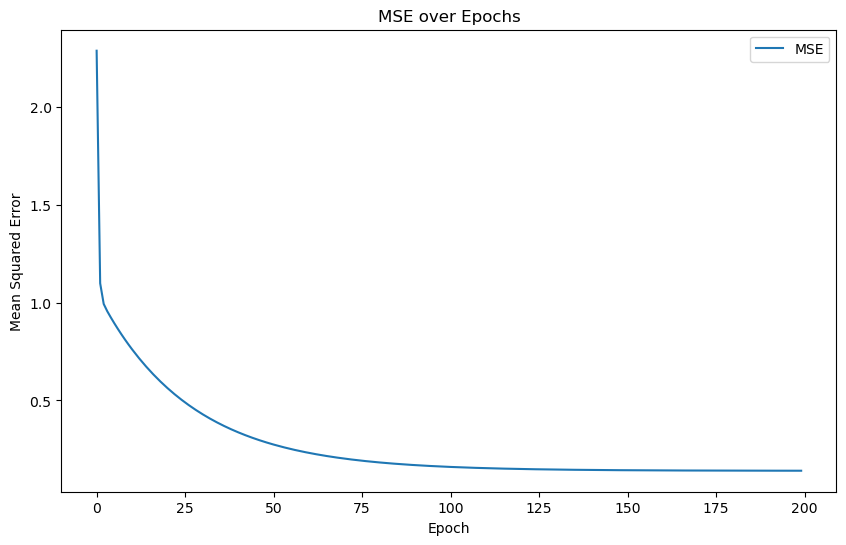

In [4]:
model = AdalineLMS(feature, label);
model.train();

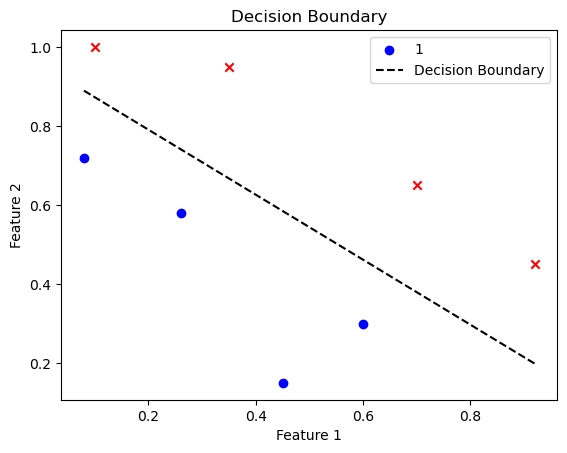

Final weights - weight_x1: -2.975049442906103 - weight_x2: -3.6173081911937097 - bias: 3.455176857095627


In [5]:
# Plot decision boundary

for i in range(len(label)):

    if label[i] == 1:
        plt.scatter(feature[i][0], feature[i][1], color='blue', marker='o', label='1' if i == 0 else "");
    else:
        plt.scatter(feature[i][0], feature[i][1], color='red', marker='x', label='-1' if i == 0 else "");

# Plotting the decision boundary
x1_min, x1_max = min(feature[:, 0]), max(feature[:, 0]); # Get min-max for x1

# Get min-max for x2
x2_min = (-model.weight_x1 * x1_min - model.bias) / model.weight_x2;
x2_max = (-model.weight_x1 * x1_max - model.bias) / model.weight_x2;

plt.plot([x1_min, x1_max], [x2_min, x2_max], 'k--', label='Decision Boundary'); #
plt.xlabel('Feature 1');
plt.ylabel('Feature 2');
plt.title('Decision Boundary');
plt.legend();
plt.show();

print(f"Final weights - weight_x1: {model.weight_x1} - weight_x2: {model.weight_x2} - bias: {model.bias}");